In [1]:
import os
os.getcwd()


'C:\\Users\\ellah\\Documents\\european_weather_elt'

In [2]:
import glob

parquet_files = glob.glob("**/*.parquet", recursive=True)
parquet_files


['data\\export\\weather.parquet']

In [9]:
df = pd.read_parquet("data/export/weather.parquet")


In [11]:
# 1. Load the data
df = pd.read_parquet("data/export/weather.parquet")

# 2. Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# 3. Extract year from date
df['year'] = df['date'].dt.year

# 4. Now filter by target years
target_years = [1984, 1994, 2004, 2014, 2024]
df_filtered = df[df['year'].isin(target_years)].copy()

# 5. Add average temperature
df_filtered['temperature'] = (df_filtered['temp_min'] + df_filtered['temp_max']) / 2


In [12]:
df_filtered['city'].unique()


array(['Paris', 'Vienna', 'Rome', 'Stockholm', 'Warsaw'], dtype=object)

In [13]:
df_filtered.columns


Index(['city', 'date', 'temp_min', 'temp_max', 'year', 'temperature'], dtype='object')

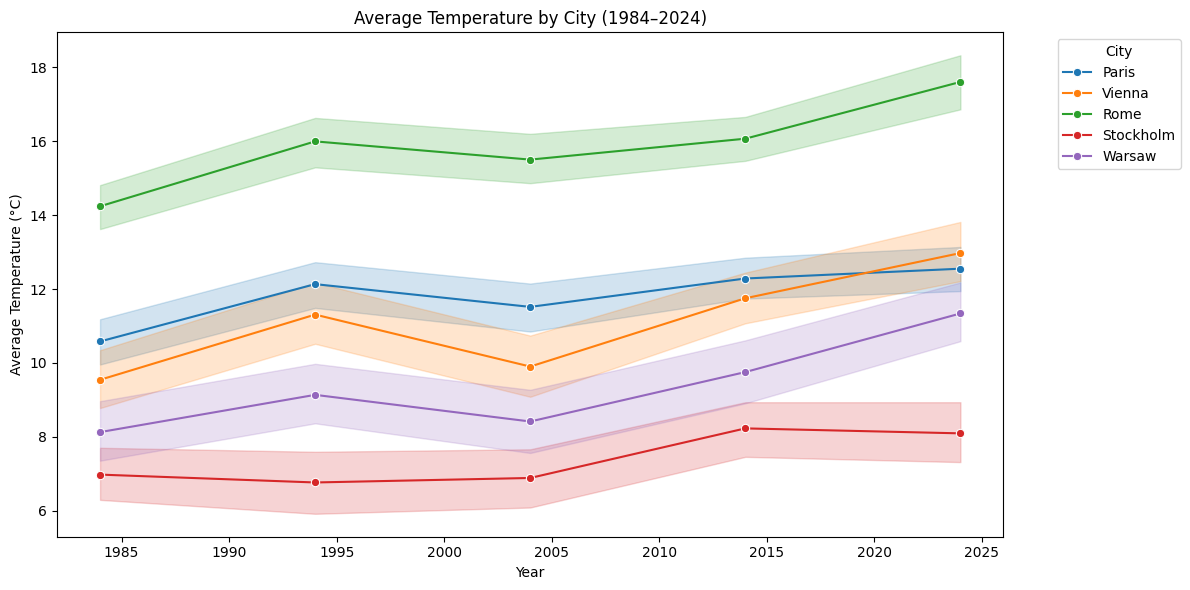

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='year', y='temperature', hue='city', marker='o')
plt.title("Average Temperature by City (1984–2024)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
df_filtered['decade'] = (df_filtered['year'] // 10) * 10



In [17]:
city_decade_max_avg = (
    df_filtered.groupby(['city', 'decade'])['temp_max']
    .mean()
    .reset_index()
)


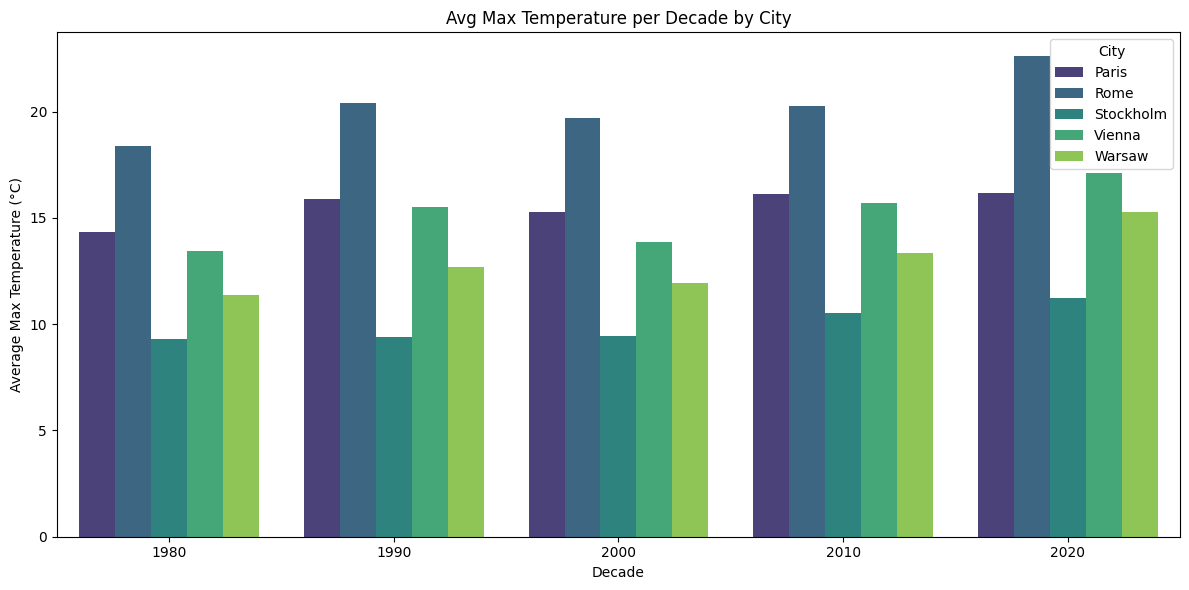

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=city_decade_max_avg, x='decade', y='temp_max', hue='city', palette='viridis')
plt.title("Avg Max Temperature per Decade by City")
plt.xlabel("Decade")
plt.ylabel("Average Max Temperature (°C)")
plt.legend(title='City')
plt.tight_layout()
plt.show()


In [19]:
temp_table = df_filtered.pivot_table(
    index='city',
    columns='year',
    values='temp_max',
    aggfunc='mean'
).round(2)

temp_table = temp_table[[1984, 1994, 2004, 2014, 2024]]  # reorder columns if needed
temp_table

year,1984,1994,2004,2014,2024
city,,,,,
Paris,14.34,15.90,15.28,16.10,16.18
Rome,18.39,20.41,19.69,20.24,22.59
Stockholm,9.28,9.39,9.44,10.52,11.23
Vienna,13.44,15.52,13.88,15.70,17.12
Warsaw,11.37,12.69,11.93,13.34,15.29


In [20]:
temp_table = df_filtered.pivot_table(
    index='city',
    columns='year',
    values='temp_min',
    aggfunc='mean'
).round(2)

temp_table = temp_table[[1984, 1994, 2004, 2014, 2024]]  # reorder columns if needed
temp_table


year,1984,1994,2004,2014,2024
city,,,,,
Paris,6.82,8.37,7.75,8.47,8.92
Rome,10.09,11.58,11.31,11.89,12.62
Stockholm,4.67,4.14,4.33,5.93,4.96
Vienna,5.65,7.09,5.92,7.80,8.82
Warsaw,4.89,5.58,4.89,6.17,7.39


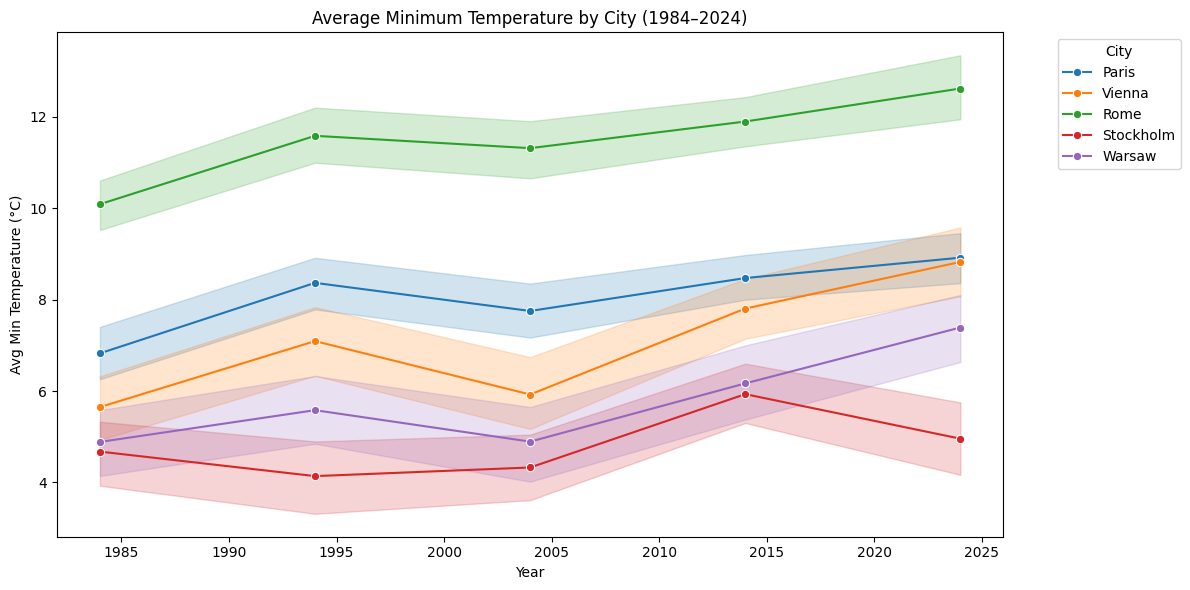

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='year', y='temp_min', hue='city', marker='o')

plt.title("Average Minimum Temperature by City (1984–2024)")
plt.xlabel("Year")
plt.ylabel("Avg Min Temperature (°C)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
df_filtered.groupby("city")[["temp_min", "temp_max", "temperature"]].describe()


temp_min                                                     \
             count       mean       std   min  25%    50%   75%   max   
city                                                                    
Paris       1828.0   8.065208  5.434542  -6.3  4.1   8.30  12.2  21.8   
Rome        1828.0  11.498249  6.034407  -3.2  6.8  11.10  16.4  25.6   
Stockholm   1828.0   4.805689  7.196038 -17.5 -0.4   4.50  10.8  21.6   
Vienna      1828.0   7.057932  7.237841 -17.7  1.3   7.50  12.6  22.1   
Warsaw      1828.0   5.783151  7.346017 -18.8  0.2   6.05  11.7  22.2   

          temp_max             ...             temperature             \
             count       mean  ...   75%   max       count       mean   
city                           ...                                      
Paris       1828.0  15.559792  ...  20.4  35.2      1828.0  11.812500   
Rome        1828.0  20.267396  ...  25.5  38.8      1828.0  15.882823   
Stockholm   1828.0   9.972046  ...  16.8  29.9      1828.0   7.388868   
Vienna      1828.0  15.130963  ...  21.6  35.2      1828.0  11.094447   
Warsaw      1828.0  12.922976  ...  20.1  34.6      1828.0   9.353063   

                                                           
                std    min    25%     50%      75%    max  
city                                                       
Paris      5.845497  -2.30   7.25  11.850  16.3000  28.00  
Rome       6.387022   0.55  10.80  15.100  20.9000  31.45  
Stockholm  7.605993 -13.25   1.40   7.175  13.8000  24.80  
Vienna     7.889715 -14.55   4.90  11.400  17.1125  28.05  
Warsaw     8.127560 -15.90   2.95   9.700  15.8000  28.40  

[5 rows x 24 columns]

<Axes: xlabel='year', ylabel='city'>

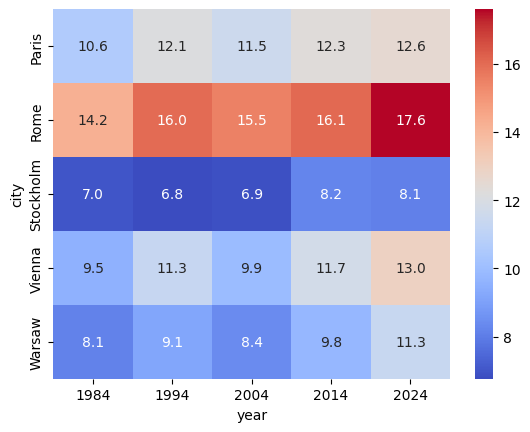

In [25]:
pivot = df_filtered.pivot_table(values='temperature', index='city', columns='year')
sns.heatmap(pivot, cmap="coolwarm", annot=True, fmt=".1f")
